In [1]:
import pre_process as pp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
from PIL import Image
import pre_process as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
import os

{0: 0.7089201877934272, 1: 1.3603603603603605, 2: 1.1705426356589148}
(300, 300, 4)
[1]


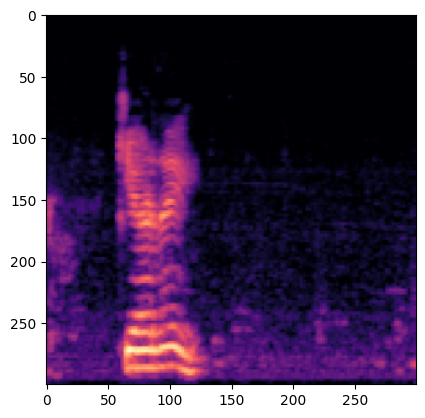

In [2]:
df=pd.read_csv('Dataset_csv\\dataset.csv')
X=np.array(df['Data'])
Y=np.array(df['Label']).reshape(-1,1)
class_weights = class_weight.compute_class_weight(class_weight='balanced',  classes=np.unique(Y), y=np.squeeze(Y))
class_weights=list(class_weights)
class_weights = dict(zip(np.unique(Y), class_weights))
print(class_weights)

X=np.array([pp.convert_to_array(i) for i in X])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


input_image=X_train[-1]
print(input_image.shape)
plt.imshow(input_image,cmap=plt.cm.binary)
print(y_train[-1])

In [4]:
def create_cnn_model():
    try:
        model=tf.keras.models.load_model('Final_Model.h5')
        print('Previous Model Loaded')
    except:

        model=tf.keras.models.Sequential() #if imported from tensorflow.keras import models we would write models.Sequential
        
        model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(300,300,4)))
        model.add(tf.keras.layers.MaxPool2D((2,2)))
        model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
        model.add(tf.keras.layers.MaxPool2D((2,2)))
        
        model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
        model.add(tf.keras.layers.MaxPool2D((2,2)))
        
        model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu'))
        model.add(tf.keras.layers.MaxPool2D((2,2)))
        
        model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu'))
        model.add(tf.keras.layers.MaxPool2D((2,2)))
        
        model.add(tf.keras.layers.Conv2D(512*2,(3,3),activation='relu'))
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(64,activation='relu'))
        model.add(tf.keras.layers.Dense(32,activation='relu'))
        model.add(tf.keras.layers.Dense(len(np.unique(Y)),activation='sigmoid')) #will update this when i have multiple classes at this phase only 2 class so binary 
        opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
        model.compile(optimizer=opt,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(), #will change this to binary crossentropy
                metrics=['accuracy'])
        model.summary()
    return model

def plot_metrics_for_training(history):
    
    plt.figure(figsize=(25, 10))
    plt.subplot(221)
    plt.plot(history['accuracy'], label='accuracy')
    plt.plot(history['val_accuracy'], label = 'val_accuracy')
    plt.xticks(np.arange(len(history['accuracy'])), np.arange(1, len(history['accuracy'])+1))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.001, 1.05])
    plt.legend(loc='lower right')

    plt.subplot(222)
    plt.plot(history['loss'], label='loss')
    plt.plot(history['val_loss'], label = 'val_loss')
    plt.xticks(np.arange(len(history['loss'])), np.arange(1, len(history['loss'])+1))
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.ylim([0.001, 4.5])
    plt.legend(loc='upper center')
    plt.savefig('output_details.png')

CNN_model=create_cnn_model()
callback = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss',restore_best_weights=True )

Previous Model Loaded


<h3> Training Model </h3>

In [91]:
history_for_plotting=CNN_model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),shuffle=True,class_weight=class_weights,callbacks=[callback])

Epoch 1/100
4/4 [==============================] - 6s 1s/step - loss: 24.6772 - accuracy: 0.4257 - val_loss: 14.7578 - val_accuracy: 0.1800
Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 6.0576 - accuracy: 0.3168 - val_loss: 1.8601 - val_accuracy: 0.3200
Epoch 3/100
4/4 [==============================] - 4s 990ms/step - loss: 1.5776 - accuracy: 0.4356 - val_loss: 1.0957 - val_accuracy: 0.3200
Epoch 4/100
4/4 [==============================] - 4s 985ms/step - loss: 1.0439 - accuracy: 0.4356 - val_loss: 0.7998 - val_accuracy: 0.6800
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: 0.9244 - accuracy: 0.6040 - val_loss: 0.7911 - val_accuracy: 0.7400
Epoch 6/100
4/4 [==============================] - 4s 989ms/step - loss: 0.7640 - accuracy: 0.7426 - val_loss: 0.8853 - val_accuracy: 0.5200
Epoch 7/100
4/4 [==============================] - 4s 999ms/step - loss: 0.7481 - accuracy: 0.6040 - val_loss: 0.6085 - val_accuracy: 0.8000
Epoch 8/100
4/4 [===

{'loss': [24.677156448364258, 6.057626724243164, 1.5775972604751587, 1.0439174175262451, 0.9243916273117065, 0.7639768123626709, 0.7481118440628052, 0.6639615297317505, 0.6529557704925537, 0.6820084452629089, 0.5022284984588623, 0.48088538646698, 0.27777421474456787, 0.2591436505317688, 0.16321982443332672, 0.2764100432395935, 0.1871594786643982, 0.1330595761537552, 0.05947522819042206, 0.03623531386256218, 0.03040509670972824, 0.01818220503628254, 0.1523514986038208], 'accuracy': [0.42574256658554077, 0.31683167815208435, 0.4356435537338257, 0.4356435537338257, 0.603960394859314, 0.7425742745399475, 0.603960394859314, 0.7524752616882324, 0.5742574334144592, 0.6732673048973083, 0.8217821717262268, 0.7821782231330872, 0.9108911156654358, 0.9108911156654358, 0.9306930899620056, 0.8811880946159363, 0.9108911156654358, 0.9306930899620056, 0.9603960514068604, 0.9801980257034302, 0.9900990128517151, 1.0, 0.9405940771102905], 'val_loss': [14.757831573486328, 1.8601258993148804, 1.095651745796

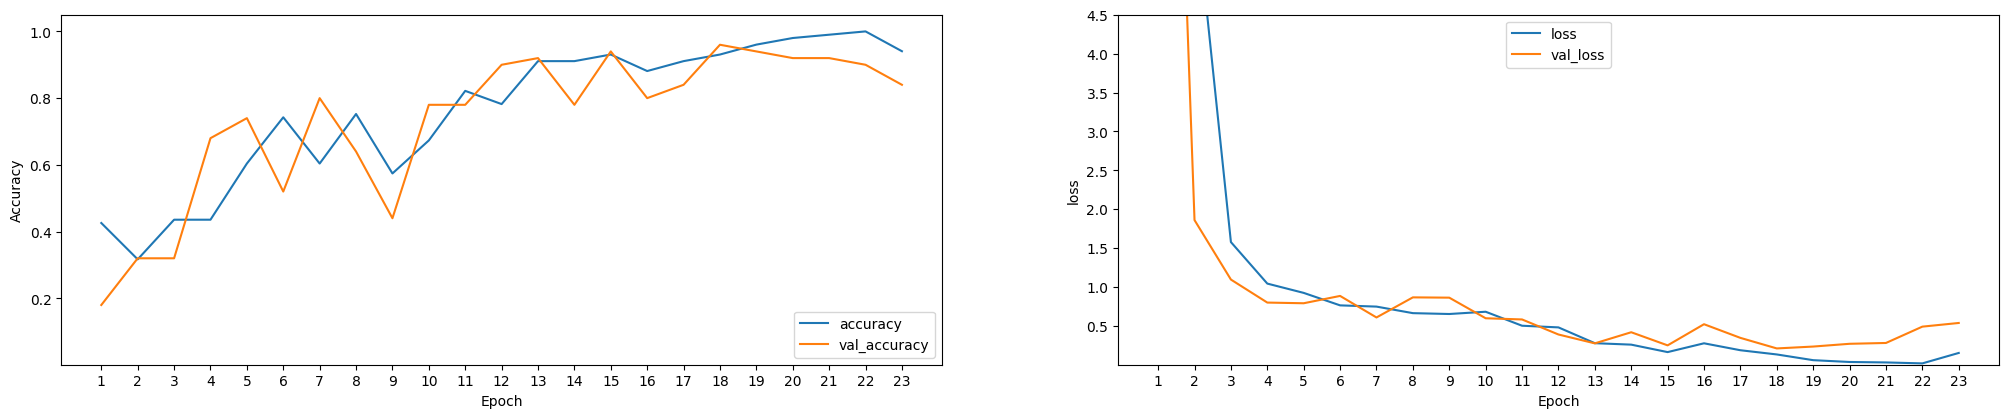

In [92]:
print(history_for_plotting.history)
plt_history=history_for_plotting.history
plot_metrics_for_training(plt_history)

<h3> Raw Testing. </h3>

In [93]:
input_image.shape
CNN_model.predict(input_image.reshape(1,300,300,4))

1/1 [==============================] - 0s 83ms/step


array([[4.4445698e-03, 9.7669125e-01, 3.4069427e-04]], dtype=float32)

In [94]:
Y_verify=CNN_model.predict(X_test)
Y_verify=np.argmax(Y_verify,axis=1).reshape(-1,1)
print(classification_report(y_test, Y_verify))

2/2 [==============================] - 0s 135ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       1.00      1.00      1.00         9
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.97      0.97      0.97        50
weighted avg       0.96      0.96      0.96        50



<h4> Proper Testing from wav file to classifed output </h4>

File Checked on: d:\Projects\Classification\Audio_Classification_\check_2.wav
d:\Projects\Classification\Audio_Classification_\check_2.png
d:\Projects\Classification\Audio_Classification_
(300, 300, 4)
1/1 [==============================] - 0s 29ms/step
[4.5647230e-03 4.9922773e-01 3.7283717e-05]
output: Kgardai


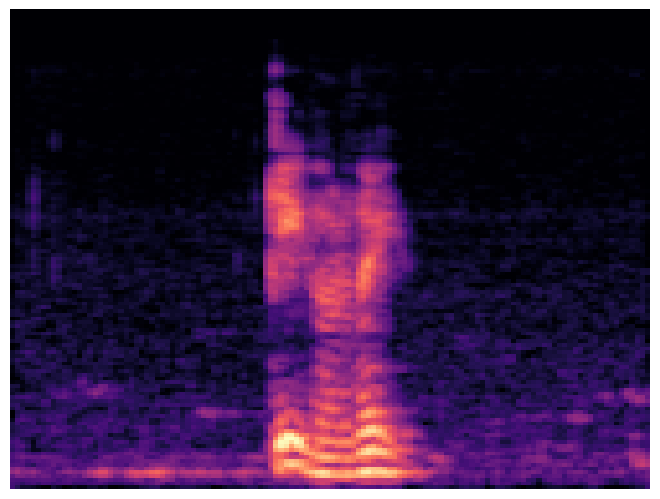

In [7]:
def current_directory_update(testing_wav_file_path):
    if '/' in testing_wav_file_path:
        testing_wav_file_path=testing_wav_file_path.replace('/','\\')
    if '\\' not in testing_wav_file_path:
        testing_wav_file_path=os.getcwd()+'\\'+testing_wav_file_path
    return testing_wav_file_path
classes=pp.get_classes_name(df)
testing_wav_file_path=current_directory_update(input('Enter path of the testing wav file: '))


print(f'File Checked on: {testing_wav_file_path}')
testing_img_file_path=testing_wav_file_path.replace('.wav','.png')
print(testing_img_file_path)
pp.graph_spectrogram(testing_wav_file_path)

testing_img_file_path=pp.convert_to_array(testing_img_file_path)
print(testing_img_file_path.shape)
op=CNN_model.predict(testing_img_file_path.reshape(1,300,300,4))
op=np.argmax(op[0])
print(f'output: {classes[op]}')
os.remove(testing_wav_file_path.replace('.wav','.png'))

In [98]:
CNN_model.save('Final_Model.h5')